### Importamos todas las librerias a usar

In [5]:
import math
import scipy.stats as st
from IPython.display import display, Markdown, Latex
import pandas as pd
import matplotlib.pyplot as plt
import IPython.core.display as di
import numpy as np
import matplotlib.image as mpimg
from scipy.stats import f

# Repaso Previo a la Pc 3
## Prueba de Kruskal Wallis

Un Ing. Empresarial realizó un experimento para comparar las ventas de 3 variedades de papas. Los resultados en miles de soles se presentan a continuación:

![S7Ej1](../Images/S7ej1.png)

A un nivel de Significacion de 0.05,Pruebe con que variedad se obtiene la mayor venta promedio

1 . **Planteamiento de la hipotesis**

* Ho: Las muestras de ventas de papa provienen de poblaciones idénticas.
* H1: Las muestras de ventas de papa provienen de poblaciones diferentes.

**Datos relevantes:**
- Nivel de Significacion ($\alpha$) = 0.05


In [6]:
# Datos

a = 0.05
k = 3 # Numero de grupos
grupoA=[2.3,4.1,3.2,3.8,1.4]
grupoB=[2.1,2.6,2.4,2.5,2.2]
grupoC=[3.6,4.1,3.2,3.3,3.9]
# grupoD=[1.32,1.64,1.89,1.12,1.23]
diferencias = grupoA+grupoB+grupoC
n = len(diferencias)


# Ordenamos e imprimimos las diferencias
listaOrdenada = sorted(diferencias)

# Obtenemos el valor absoluto y le asignamos un valor de orden
listaOrdAbs=[]
orden=[]
for posc,numero in enumerate(listaOrdenada):
    listaOrdAbs.append(abs(numero))
    orden.append(posc+1)

# Obtenemos el rango
rango = orden
valorAnterior = 0
for posc,numero in enumerate(listaOrdAbs):
    if (valorAnterior==numero):
        ValorRango = (((posc)+(posc+1))/2)
        rango[posc-1]=ValorRango
        rango[posc]=ValorRango
    valorAnterior=numero

# Mostramos La comparacion entre las filas de Diferencias Y Rangos
print("\nComparacion de Filas de Diferencias Y Rangos")
print(listaOrdenada)
print(rango)

# Calcula la suma y el promedio para cada grupo
R2ni = 0
for nombre, grupo in zip(['Grupo A', 'Grupo B', 'Grupo C'], [grupoA, grupoB, grupoC]):
    sumaGrupo = 0
    promGrupo = 0
    rangos_grupo = []  # Almacenará los rangos correspondientes a cada valor del grupo
    
    for valor in grupo:
        indice = listaOrdenada.index(valor)  # Obtenemos el índice del valor en la lista ordenada
        rango_valor = rango[indice]  # Obtenemos el rango correspondiente
        rangos_grupo.append(rango_valor)  # Añadimos el rango a la lista de rangos del grupo
        sumaGrupo += rango_valor
    
    # Calcula el promedio
    if grupo:  # Asegura que el grupo no esté vacío para evitar dividir por cero
        promGrupo = sumaGrupo / len(grupo)  # Corrige la división aquí
    
    # Calculamos R^2_i/n_i
    R2ni += (sumaGrupo ** 2) / len(grupo)
    
    # Imprime los resultados
    print(f"\n{nombre}")
    print(grupo)
    print(rangos_grupo)
    print(f"Suma = {sumaGrupo}\nPromedio = {promGrupo}")

# Se calcula el estadistico H
H = (12/(n*(n+1)))*(R2ni)-(3*(n+1))
#H, p_value = st.kruskal(grupoA,grupoB,grupoC) #-> Forma Corta :)

print("\nEstadistico de Prueba H")
display(Latex(f"$$\\text{{H}}=\\frac{{12}}{{{n}({n}+1)}}*[{round(R2ni,3)}]-{3*(n+1)}={round(H,3)}$$"))

# Tabla Xi Cuadrado
Xi = round(st.chi2.ppf(1-a,k-1),3)
print("Valor Xi cuadrado:",Xi)

# Conclusion
if H>Xi:
    print("Conclusion: Se rechaza la H0")
else:
    print("Conclusion: Se acepta la H0")


Comparacion de Filas de Diferencias Y Rangos
[1.4, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 3.2, 3.2, 3.3, 3.6, 3.8, 3.9, 4.1, 4.1]
[1, 2, 3, 4, 5, 6, 7, 8.5, 8.5, 10, 11, 12, 13, 14.5, 14.5]

Grupo A
[2.3, 4.1, 3.2, 3.8, 1.4]
[4, 14.5, 8.5, 12, 1]
Suma = 40.0
Promedio = 8.0

Grupo B
[2.1, 2.6, 2.4, 2.5, 2.2]
[2, 7, 5, 6, 3]
Suma = 23
Promedio = 4.6

Grupo C
[3.6, 4.1, 3.2, 3.3, 3.9]
[11, 14.5, 8.5, 10, 13]
Suma = 57.0
Promedio = 11.4

Estadistico de Prueba H


<IPython.core.display.Latex object>

Valor Xi cuadrado: 5.991
Conclusion: Se acepta la H0


# Prueba de Signo


Se afirma que el nÚmero de unidades ensambladas con un nuevo sistema rediseñado será mayor que el número de unidades ensambladas con el antiguo sistema, cuya mediana poblacional es de 80 unidades por turno laboral.

Pruebe si dicha afirmación es cierta al nivel de significación del 5%. Los datos muestrales del número de unidades ensambladas con el nuevo sistema se reportan en la siguiente tabla:

![S7Ej2](../Images/S7Ej2.png)

**Paso 1-Identificar el tipo de Prueba**

*Prueba bilateral*
$$
\begin{array}{c}H_o{:}Me\leq80\\H_1{:}Me>80\end{array}
$$

Datos relevantes:

- Nivel de significacion ($\alpha$) = O.05
- Tamño de la muestra ($n$) = 12
- Media ($X_i$) = 80


In [7]:
datos = [75,85,92,80,94,90,91,76,88,82,96,83]

# Declaramos variables conocidas
a = 0.05
n = 12
Xi = 80
arMas = 0

# Aplicamos el signo de la diferencia a+ ó Comparacion con la mediana
for numero in datos:
    if (numero-Xi>0):
        arMas+=1
    elif(numero-Xi==0):
        n-=1

# Definimos las funciones P.U.S Y P.U.I
def pus(nElementos,valorRmas):
    P = 0
    resultados = []
    for i in range(valorRmas,nElementos+1):
        # Se aplica el coeficiente binomial
        P += 2 * math.comb(nElementos,i) * (0.5**i) * (0.5 ** (nElementos-i))
        resultados.append(P)
        print ("(",nElementos,"/",i,")*0.5^",i,"*0.5^",nElementos-i,"=",resultados[valorRmas-i])
    print("\nEl valor de P es:",round(P,4))
    return P

def pui(nElementos,valorRmas):
    P = 0
    resultados = []
    for i in range(0,valorRmas+1):
        # Se aplica el coeficiente binomial
        P += math.comb(nElementos,i) * (0.5**i) * (0.5 ** (nElementos-i))
        resultados.append(P)
        print ("(",nElementos,"/",i,")*0.5^",i,"*0.5^",nElementos-i,"=",resultados[i])
    print("\nEl valor de P es:",round(P,4))
    return P

print("Valor de a r+ =",arMas)
# Verficamos el valor de a r+ 
if (arMas>(n/2)):
    print("Se aplica prueba unilateral Superior\n")
    P=pus(n,arMas)
else:
    print("Se aplica prueba unilateral Inferior\n")
    P=pui(n,arMas)

# Regla de decicion se P es <= que a

if (P>a):
    print("P =",round(P,4),">",a,"\nConclusion: No se rechaza H0")
else:
    print("P =",round(P,4),"<",a,"\nConclusion: Se rechaza H0")

Valor de a r+ = 9
Se aplica prueba unilateral Superior

( 11 / 9 )*0.5^ 9 *0.5^ 2 = 0.0537109375
( 11 / 10 )*0.5^ 10 *0.5^ 1 = 0.064453125
( 11 / 11 )*0.5^ 11 *0.5^ 0 = 0.064453125

El valor de P es: 0.0654
P = 0.0654 > 0.05 
Conclusion: No se rechaza H0


# Prueba de Wilcoxon 


Un grupo de investigadores quiere medir el impacto de implementar un nuevo método deenseñanza en la Universidad U T P, para lo cual tomaron una prueba antes y después de implementar el método de enseñanza a un grupo de estudiantes. Los resultados se muestran a continuación:

![S7Ej3](../Images/S7Ej3.png)

Determine con un nivel de significacion del 0.05, si existen diferencias entre ambos metodos de enseñanza.

Los parámetros relevantes son:
- Nivel de significacion ($\alpha$) = 0.05
- Tamano de muestra $n$ = 12

**Planteamos la hipotesis**

a = Sin nuevo Metodo

b = Con nuevo Metodo

* $H_0:Ua = Ub$
* $H_1:Ua \neq Ub$ 



In [9]:
# Datos
n = 12
a = 0.05
antes =   [9,12,15,9,7,13,12,13,11,11,15,9]
despues = [14,18,13,19,16,18,17,16,15,17,14,16]
diferencias = []

# Calculamos la diferencia de los valores
for i in range(len(antes)):
    diferencias.append(antes[i]-despues[i])

# Imprimimos las diferencias
print("Diferencias:")
print(diferencias)


# Obtenemos el valor absoluto sin ordenar y creamos la lista orden (1,2,3...)
listaAbs=[]
orden=[]
for posc,numero in enumerate(diferencias):
    listaAbs.append(abs(numero))
    orden.append(posc+1)
print(listaAbs)

# Ordenamos e imprimimos las diferencias
listaOrdenada = sorted(listaAbs)


# Imprimimos las listas
print("Diferencia Ordenada y Con Valor absoluto")
print(listaOrdenada)
print("Orden De los Valores")
print(orden)

# Obtenemos el rango
rango = orden
valorSiguiente = 0
contador = 0
for posc,numero in enumerate(listaOrdenada):
    if (valorSiguiente==numero):
        if contador == 0:
            ValorRango = rango[posc-1]+0.5
            rango[posc]=ValorRango
            if rango[posc]>1:
                rango[posc-1]=ValorRango
            contador +=1
        elif contador >= 1:
            rango[posc]=rango[posc-1]
    else:
        contador = 0
    valorSiguiente = numero
rango[0] = 1
print("Rango")
print(rango)

# Lista de rangos en orden original:
rangosOrdenOriginal = []
for valor in listaAbs:
    indice = listaOrdenada.index(valor)  # Obtener el índice del valor en la lista original
    ValorRango = rango[indice]  # Obtener el rango correspondiente
    rangosOrdenOriginal.append(ValorRango)  # Agregar el rango a la nueva lista


# Calculamos la suma de los rangos para las diferencias Positivas y Negativas
Tpositivo = 0
TNegativo = 0
for posc,numero in enumerate(diferencias):
    if numero>0:
        Tpositivo += rangosOrdenOriginal[posc]
    else:
        TNegativo += rangosOrdenOriginal[posc]

# Mostramos La comparacion entre las filas de Diferencias Y Rangos
print("\nComparacion de Filas de Diferencias Y Rangos")
print(diferencias)
print(rangosOrdenOriginal)

# Identificamos la suma de rangos minima
Tminimo = 0
if Tpositivo>TNegativo:
    Tminimo = TNegativo
else:
    Tminimo = Tpositivo

print("\nT+ =",Tpositivo)
print("T- =",TNegativo)
print("T = Min(T+,T-) =",Tminimo)

# Reemplazamos en la formula de la E(T) E en funcion de T
print("\nReemplazamos en las Formulas")
E =  (n*(n+1)/4)
display(Latex(f"$$E(t)=\\frac{{{n}({n}+1)}}{4}=\\frac{{{n*(n+1)}}}{4}={E}$$"))

# Reemplazamos en la formula de la o(t) o en funcion de t
O = (n*(n+1)*(2*n+1)/24)
display(Latex(f"$$\sigma(t)=\\frac{{{n}({n}+1)(2*{n}+1)}}{{24}}=\\frac{{{n}({n+1})({2*n+1})}}{{24}}={O}$$"))

# Calculamos Z
Z = round((Tminimo - E)/math.sqrt(O),4)
display(Latex(f"$$Z=\\frac{{{Tminimo}-{E}}}{{\sqrt{{{O}}}}}=\\frac{{{Tminimo-E}}}{{{round(math.sqrt(O),3)}}}={Z}$$"))

# Calculamos Z Tabla
Z1 = a/2
Z2 = 1-(a/2)
Zt1 = round((st.norm.ppf(Z1)),3)
Zt2 = round((st.norm.ppf(Z2)),3)
print("Z(a/2) = Z(",Z1,") =",Zt1)
print("Z(1-(a/2)) = Z(",Z2,") =",Zt2)

# Comparamos resultados para la Hipotesis, Revisa La Hipotesis!!
if Z > Z1 and Z < Z2:
    print("Conclusion: Se Acepta H0")
else:
    print("Conclusion: Se rechaza H0")

Diferencias:
[-5, -6, 2, -10, -9, -5, -5, -3, -4, -6, 1, -7]
[5, 6, 2, 10, 9, 5, 5, 3, 4, 6, 1, 7]
Diferencia Ordenada y Con Valor absoluto
[1, 2, 3, 4, 5, 5, 5, 6, 6, 7, 9, 10]
Orden De los Valores
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Rango
[1, 2, 3, 4, 5.5, 5.5, 5.5, 8.5, 8.5, 10, 11, 12]

Comparacion de Filas de Diferencias Y Rangos
[-5, -6, 2, -10, -9, -5, -5, -3, -4, -6, 1, -7]
[5.5, 8.5, 2, 12, 11, 5.5, 5.5, 3, 4, 8.5, 1, 10]

T+ = 3
T- = 73.5
T = Min(T+,T-) = 3

Reemplazamos en las Formulas


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Z(a/2) = Z( 0.025 ) = -1.96
Z(1-(a/2)) = Z( 0.975 ) = 1.96
Conclusion: Se rechaza H0


## Prueba de Bondad de ajuste 

Una empresa desea estudiar la distribución del número de accidentes de los operarios en un día  trabajo. Los resultados Obtenidos en una muestra accidentes Son los siguientes:

![S7Ej4](../Images/S7Ej4.png)

¿Se puede considerar que el número de accidentes de los operarios ocurridos en un día de trabajo tiene distribución Poisson? Use un nivel de significación del 5%

1 . **Planteamiento de la hipotesis**

* H0: El numero de accidentes se ajustan a una distribucion de Poisson
* H1: El nuemero de accidentes no se ajustan a una distribucion de Poisson

**Datos relevantes:**
- Nivel de Significacion ($\alpha$) = 0.05
- Frecuencia Observada $O_i$ = 5

In [10]:
# Datos
a = 0.05
TipoDistribucion = "Poisson"
O = 5
K = 6
fila1 = [0,1,2,3,4,5]
fila2 = [120,270,280,180,100,50]

# Calculamos Xi*Fi
xiFi = []
frecuenciaN = 0
sumaXiFi = 0
for posC,numero in enumerate(fila1):
    frecuenciaN += fila2[posC]
    valor = numero*fila2[posC]
    sumaXiFi += valor
    xiFi.append(valor)

# Calculamos el promedio
promedio = round(sumaXiFi/frecuenciaN,4)

# Estimamos el valor de p -> O*p = promedio
P = promedio/O

# Definimos las funciones para Distribucion Binomial y poisson
def poisson(k, lmbda):
    return round(math.exp(-lmbda) * (lmbda ** k) / math.factorial(k),4)

def distribucion_binomial(numero_exitos, ensayos, probabilidad_exito):
    combinaciones = math.comb(ensayos, numero_exitos)
    probabilidad_exito_n = probabilidad_exito ** numero_exitos
    probabilidad_fracaso_n = (1 - probabilidad_exito) ** (ensayos - numero_exitos)
    probabilidad = round(combinaciones * probabilidad_exito_n * probabilidad_fracaso_n,4)
    return probabilidad

# Calculamos la distribucion
if TipoDistribucion == "Poisson":
    lmbda = promedio
    Pi = []
    for Pos,numero in enumerate(fila1):
        probabilidad = poisson(numero,lmbda)
        Pi.append(probabilidad)
elif TipoDistribucion == "Binomial":
    Pi = []
    for Pos,numero in enumerate(fila1):
        probabilidad = distribucion_binomial(numero, O, P)
        Pi.append(probabilidad)

# Calculamos el valor esparado de la funcion Ei
Ei = []
for posC,numero in enumerate(Pi):
    valor = round(numero*frecuenciaN,3)
    Ei.append(valor)

# Calculamos Oi-Ei,(Oi-Ei)^2 y (Oi-Ei)^2/Ei
OiEi = []
OiEi_2 = []
OiEi_2_Ei = []
XiCalculado = 0
for posC,numero in enumerate(fila2):
    valor1 = round(numero-Ei[posC],3)
    valor2 = round(valor1**2,3)
    valor3 = round(valor2/Ei[posC],3)
    XiCalculado +=valor3
    OiEi.append(valor1)
    OiEi_2.append(valor2)
    OiEi_2_Ei.append(valor3)

# Hallamos Xi Tabular
#    Como P esta estimado m = 1
m = 1
gl = K-m-1
XiTabular = round(st.chi2.ppf(1-a,gl),3)

print("Numero Accidentes =",fila1)
print("Frecuencia (Fi) =",fila2,"| Total n =",frecuenciaN)
print("Xi*Fi =",xiFi,"| Total =",sumaXiFi)
print("Promedio Distribucion Binomial (Xi*Fi)/n =",promedio)
print("Pi =",Pi)
print("Ei =",Ei)
print("Oi-Ei =",OiEi)
print("Oi-Ei^2 =",OiEi_2)
print("(Oi-Ei^2)/Ei =",OiEi_2_Ei,"\nXi calculado =",XiCalculado)
print("Xi Tabular",XiTabular)

# Conclusion de la Hipotesis
if XiCalculado <= XiTabular:
    print("Conclusion: (XiCalculado <= XiTabular) Se Acepta H0")
else:
    print("Conclusion: (XiCalculado > XiTabular) Se Rechaza H0")

Numero Accidentes = [0, 1, 2, 3, 4, 5]
Frecuencia (Fi) = [120, 270, 280, 180, 100, 50] | Total n = 1000
Xi*Fi = [0, 270, 560, 540, 400, 250] | Total = 2020
Promedio Distribucion Binomial (Xi*Fi)/n = 2.02
Pi = [0.1327, 0.268, 0.2706, 0.1822, 0.092, 0.0372]
Ei = [132.7, 268.0, 270.6, 182.2, 92.0, 37.2]
Oi-Ei = [-12.7, 2.0, 9.4, -2.2, 8.0, 12.8]
Oi-Ei^2 = [161.29, 4.0, 88.36, 4.84, 64.0, 163.84]
(Oi-Ei^2)/Ei = [1.215, 0.015, 0.327, 0.027, 0.696, 4.404] 
Xi calculado = 6.683999999999999
Xi Tabular 9.488
Conclusion: (XiCalculado <= XiTabular) Se Acepta H0


## Prueba de Independencia


Para estudiar la dependencia entre la depresion y el estado Civil se seleciono una muestra aleatoria sirmple de 180 hombres y mujeres. La cual se detalla en el siguiente cuadro:

![ejercicio5](../Images/S7Ej5.png)

Determinar si existe independencia entre la depresión y estado civil de una persona a un nivel de significacion de 5%.

1 . **Planteamiento de la hipotesis**

* H0: No existe relación entre la depresion y el estado civil
* H1: Existe relación entre la depresion y el estado civil

**Datos relevantes:**
- Nivel de Significacion ($\alpha$) = 0.05

In [11]:
# Datos
a = 0.05
columnas = [[35, 20], [42, 19], [58, 6]]

# Se calcula el total general y los totales por fila y columna
TotalGeneral = sum(sum(columna) for columna in columnas)
TotalFila = [sum(columna) for columna in columnas]
TotalColumna = [sum(fila[i] for fila in columnas) for i in range(len(columnas[0]))]

# Se calculan los valores esperados (Ei) para cada columna
Ei = [[round((fila_total * columna_total) / TotalGeneral, 3) for columna_total in TotalColumna] for fila_total in TotalFila]

# Se calcula el chi-cuadrado observado (XiCalculado)
XiCalculado = sum((columnas[fila][columna] - Ei[fila][columna])**2 / Ei[fila][columna] for fila in range(len(columnas)) for columna in range(len(columnas[0])))

# Se calcula el chi-cuadrado tabular (XiTabular)
gl = (len(TotalFila) - 1) * (len(TotalColumna) - 1)
XiTabular = round(st.chi2.ppf(1 - a, gl), 3)

# Mostrar resultados
for i, columna in enumerate(columnas):
    print(f"Oi columna {i+1}:", columna)
    print(f"Ei columna {i+1}:", Ei[i])

print("\nTotal Columna:", TotalFila)
print("Total Fila:", TotalColumna)
print("Total General:", TotalGeneral)
print("Xi cuadrado Calculado:", XiCalculado)
print("Xi cuadrado Tabular:", XiTabular)

# Conclusion de la Hipotesis
if XiCalculado <= XiTabular:
    print("Conclusion: (XiCalculado <= XiTabular) Se Acepta H0")
else:
    print("Conclusion: (XiCalculado > XiTabular) Se Rechaza H0")

Oi columna 1: [35, 20]
Ei columna 1: [41.25, 13.75]
Oi columna 2: [42, 19]
Ei columna 2: [45.75, 15.25]
Oi columna 3: [58, 6]
Ei columna 3: [48.0, 16.0]

Total Columna: [55, 61, 64]
Total Fila: [135, 45]
Total General: 180
Xi cuadrado Calculado: 13.350720317933433
Xi cuadrado Tabular: 5.991
Conclusion: (XiCalculado > XiTabular) Se Rechaza H0


Con un nivel de significación de 0.05, xiste evidencia muestral para poder afirmar que se rechaza la hipotesis nula por tanto existe relación entre la depresión y el estado civil

# Taller N°3

En un laboratorio se observó el número de partículas a que llegan a una determinada zona procedentes de una sustancia radiactiva en un corto espacio de tiempo siempre igual, obteniéndose los siguientes resultados:

![taller3](../Images/Taller3.png)

¿Se pueden ajustar los datos obtenidos a una distribución de Poisson, con un nivel de significación del 5%?

1 . **Planteamiento de la hipotesis**

* H0: El numero de datos se ajustan a una distribucion de Poisson
* H1: El nuemero de datos no se ajustan a una distribucion Poisson

**Datos relevantes:**
- Nivel de Significacion ($\alpha$) = 0.05
- Frecuencia Observada $O_i$ = 5

In [26]:
# Datos
a = 0.05
TipoDistribucion = "Poisson"
O = 5
K = 6
fila1 = [0,1,2,3,4,5]
fila2 = [120,200,140,20,10,2]

# Calculamos Xi*Fi
xiFi = []
frecuenciaN = 0
sumaXiFi = 0
for posC,numero in enumerate(fila1):
    frecuenciaN += fila2[posC]
    valor = numero*fila2[posC]
    sumaXiFi += valor
    xiFi.append(valor)

# Calculamos el promedio
promedio = round(sumaXiFi/frecuenciaN,4)

# Estimamos el valor de p -> O*p = promedio
P = promedio/O

# Definimos las funciones para Distribucion Binomial y poisson
def poisson(k, lmbda):
    return round(math.exp(-lmbda) * (lmbda ** k) / math.factorial(k),4)

def distribucion_binomial(numero_exitos, ensayos, probabilidad_exito):
    combinaciones = math.comb(ensayos, numero_exitos)
    probabilidad_exito_n = probabilidad_exito ** numero_exitos
    probabilidad_fracaso_n = (1 - probabilidad_exito) ** (ensayos - numero_exitos)
    probabilidad = round(combinaciones * probabilidad_exito_n * probabilidad_fracaso_n,4)
    return probabilidad

# Calculamos la distribucion
if TipoDistribucion == "Poisson":
    lmbda = promedio
    Pi = []
    for Pos,numero in enumerate(fila1):
        probabilidad = poisson(numero,lmbda)
        Pi.append(probabilidad)
elif TipoDistribucion == "Binomial":
    Pi = []
    for Pos,numero in enumerate(fila1):
        probabilidad = distribucion_binomial(numero, O, P)
        Pi.append(probabilidad)

# Calculamos el valor esparado de la funcion Ei
Ei = []
for posC,numero in enumerate(Pi):
    valor = round(numero*frecuenciaN,3)
    Ei.append(valor)

# Calculamos Oi-Ei,(Oi-Ei)^2 y (Oi-Ei)^2/Ei
OiEi = []
OiEi_2 = []
OiEi_2_Ei = []
XiCalculado = 0
for posC,numero in enumerate(fila2):
    valor1 = round(numero-Ei[posC],3)
    valor2 = round(valor1**2,3)
    valor3 = round(valor2/Ei[posC],3)
    XiCalculado +=valor3
    OiEi.append(valor1)
    OiEi_2.append(valor2)
    OiEi_2_Ei.append(valor3)

# Hallamos Xi Tabular
#    Como P esta estimado m = 1
m = 0
gl = K-m-1
XiTabular = round(st.chi2.ppf(1-a,gl),3)

print("Numero Accidentes =",fila1)
print("Frecuencia (Fi) =",fila2,"| Total n =",frecuenciaN)
print("Xi*Fi =",xiFi,"| Total =",sumaXiFi)
print("Promedio Distribucion Binomial (Xi*Fi)/n =",promedio)
print("Pi =",Pi)
print("Ei =",Ei)
print("Oi-Ei =",OiEi)
print("Oi-Ei^2 =",OiEi_2)
print("(Oi-Ei^2)/Ei =",OiEi_2_Ei,"\nXi calculado =",XiCalculado)
print("Xi Tabular",XiTabular)

# Conclusion de la Hipotesis
if XiCalculado <= XiTabular:
    print("Conclusion: (XiCalculado <= XiTabular) Se Acepta H0")
else:
    print("Conclusion: (XiCalculado > XiTabular) Se Rechaza H0")

Numero Accidentes = [0, 1, 2, 3, 4, 5]
Frecuencia (Fi) = [120, 200, 140, 20, 10, 2] | Total n = 492
Xi*Fi = [0, 200, 280, 60, 40, 10] | Total = 590
Promedio Distribucion Binomial (Xi*Fi)/n = 1.1992
Pi = [0.3014, 0.3615, 0.2167, 0.0866, 0.026, 0.0062]
Ei = [148.289, 177.858, 106.616, 42.607, 12.792, 3.05]
Oi-Ei = [-28.289, 22.142, 33.384, -22.607, -2.792, -1.05]
Oi-Ei^2 = [800.268, 490.268, 1114.491, 511.076, 7.795, 1.103]
(Oi-Ei^2)/Ei = [5.397, 2.757, 10.453, 11.995, 0.609, 0.362] 
Xi calculado = 31.572999999999997
Xi Tabular 11.07
Conclusion: (XiCalculado > XiTabular) Se Rechaza H0


# Ejercicios De Clase
## Regresión lineal simple

La Propina que se le otorga a un mozo en un restaurante depende de muchos factores, por ejemplo la cordialidad del personal, Tipo de ambiente, Satisfacción por el servicio, etc. 
En el siguiente cuadro se tiene la cantidad de propina (si.) que los clientes de un restaurant dan a los mozos en función al tiempo en que se demora en servir una orden (minutos).

![S7EjC1](../Images/S7EjC1.png)

a) Identifique las variables de Interés y clasifique cada uno de ellos ¿Cómo se relacionan ambas variables?

b) Estime el modelo de Regresión lineal estimada

c) Pronosticar: ¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?

**Identificamos la Variable Independiente y Dependiente**

- Variable Independiente = Tiempo de Atencion $X$
- Variable Dependiente = Propina $Y$

**Datos:**

- Tiempo Por Hallar $X$ = 3.5

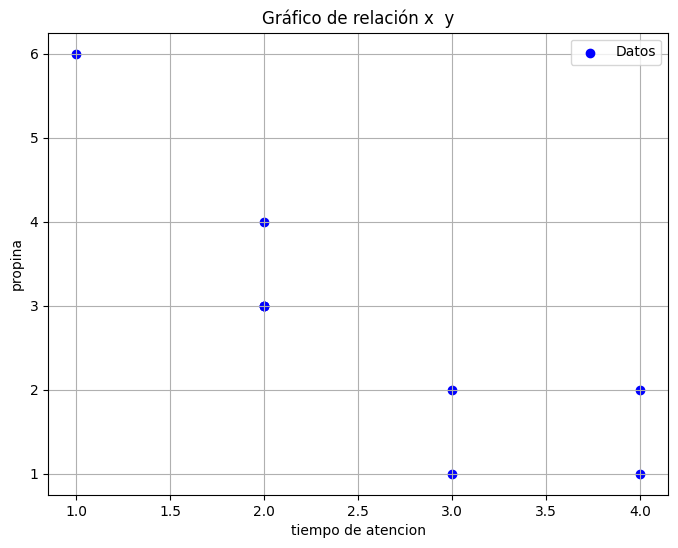

,X,Y,X*Y,X^2,Y^2
0,3,1,3,9,1
1,2,3,6,4,9
2,2,3,6,4,9
3,4,2,8,16,4
4,1,6,6,1,36
5,4,1,4,16,1
6,3,2,6,9,4
7,2,3,6,4,9
8,2,4,8,4,16
TOTAL,23,25,53,67,89


Usando las Formulas:


$$\widehat{\beta}_{1}=\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$

$$\widehat{\beta}_{0}=\frac{\sum Y-\widehat{\beta}_{1}\sum X}n$$


PASO 1
B1 = -98 / 74  = -1.3243

PASO 2
B0 = 55.4589 / 9  = 6.1621

Ecuacion de Pronostico
Y = 6.1621 -1.3243 X
B1 = Cuando el tiempo de atencion aumenta en 1 la propina en promedio
     disminuye 1.3243
B0 = Cuando el tiempo de atencion sea 0 o minimo la propina en promedio
     será de 6.1621 

¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?
Respuesta Pregunta = 1.52705


In [12]:
# Datos
pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
VariableX = 3.5
x = [3,2,2,4,1,4,3,2,2]
TextX = "tiempo de atencion"
y = [1,3,3,2,6,1,2,3,4]
TextY = "propina"
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# Creando Tabla
Tabla1 = {
    'X': x+[sum(x)],
    'Y': y+[sum(y)],
    'X*Y': xy+[sum(xy)],
    'X^2': x2+[sum(x2)],   
    'Y^2': y2+[sum(y2)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={n:'TOTAL'})

# Mostrar el DataFrame
display(df)

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
print("Usando las Formulas:")
display(di.Markdown("$$\widehat{\\beta}_{1}=\\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$"))
display(di.Markdown("$$\widehat{\\beta}_{0}=\\frac{\sum Y-\widehat{\\beta}_{1}\sum X}n$$"))
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)


# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,B1,"X")
estado = ""
if B1<0:
    estado="disminuye"
else:
    estado="aumenta"

print("B1 = Cuando el",TextX,"aumenta en 1 la",TextY,"en promedio\n    ",estado,abs(B1))
print("B0 = Cuando el",TextX,"sea 0 o minimo la",TextY,"en promedio\n     será de",abs(B0),"\n")

# Calculo de pregunta reemplazando la variable
PronosticoXy = B0+(B1*VariableX)
print(pregunta)
print("Respuesta Pregunta =",PronosticoXy)




## Regresion Lineal (Con Intervalo de Confianza)
Se un para determinar relacion entre el tiempo de uso (en años) de un grupo
de una fábrica y las eficiencias de las mismas (%). Los datos se dan a continuación:

![S7EjC2](../Images/S7EJC2.png)

a) Identifique las variables de interés V clasifique cada ellos ¿Córno se relacionan ambas variables?

b) Estime el modelo de regresión lineal estimada

c) Pronosticar: ¿Cuánto en promedio sera la eficiencia de que una maquina que tiene un tiempo de uso de 5 años?

Encontrar un **intervalo de predicción** de un valor individual y un **intervalo de confianza** para el valor medio a un 95% para evaluar la eficiencia de la máquina cuando el tiempo de uso es de 5 años.

**Identificamos la Variable Independiente y Dependiente**

- Variable Independiente = Tiempo de uso $X$
- Variable Dependiente = Eficiencia $Y$

**Datos:**

- Tiempo Por Hallar $X$ = 5



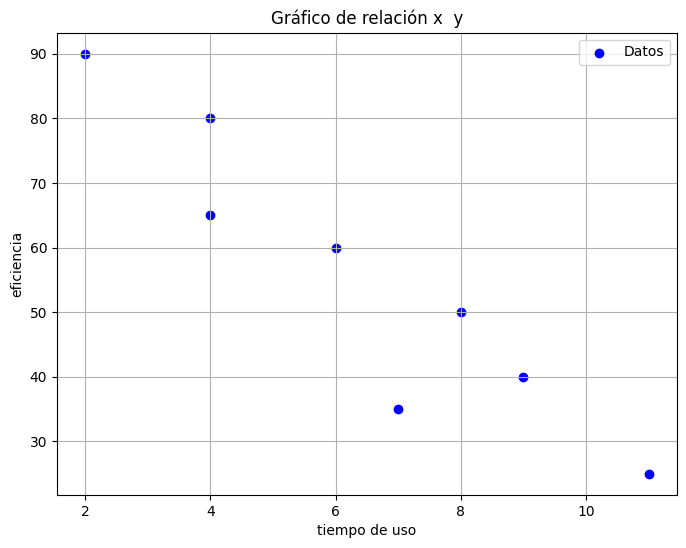

,X,Y,X*Y,X^2,Y^2
0,2,90,180,4,8100
1,4,65,260,16,4225
2,11,25,275,121,625
3,9,40,360,81,1600
4,4,80,320,16,6400
5,6,60,360,36,3600
6,7,35,245,49,1225
7,8,50,400,64,2500
TOTAL,51,445,2400,387,28275


Media (X) = 6.375
Media (Y) = 55.625
Usando las Formulas:


$$\widehat{\beta}_{1}=\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$

$$\widehat{\beta}_{0}=\frac{\sum Y-\widehat{\beta}_{1}\sum X}n$$


PASO 1
B1 = -3495 / 495  = -7.0606

PASO 2
B0 = 805.0906 / 8  = 100.6363

Ecuacion de Pronostico
Y = 100.6363 -7.0606 X
B1 = Cuando el tiempo de uso aumenta en 1 la eficiencia en promedio
     disminuye 7.0606
B0 = Cuando el tiempo de uso sea 0 o minimo la eficiencia en promedio
     será de 100.6363 

¿Cuánto en promedio sera la eficiencia (%) de que una maquina que tiene un tiempo de uso de 5 años?
Respuesta Pregunta = 65.33330000000001

SC(X) = 387 - 325.125 = 61.875
CME = 28275 - 8 * 3094.140625 - -7.0606 * 2400 - 8 * 354.609375 / 7 = 62.4679
T-Student: T(1-a/2,n-2) = 2.4469

- Intervalo de Prediccion
Limite Inferior: 44.54398933930657 
Limite Superior: 86.12261066069345

- Intervalo de Confianza
Limite Inferior: 57.70570830397282 
Limite Superior: 72.9608916960272


In [13]:
# Opciones = "Prediccion" "Confianza" "Ambos" / "nada"
tipoIntervalo = "Ambos"

# Datos
a = 1-0.95
pregunta = "¿Cuánto en promedio sera la eficiencia (%) de que una maquina que tiene un tiempo de uso de 5 años?"
VariableX = 5
x = [2,4,11,9,4,6,7,8]
TextX = "tiempo de uso"
y = [90,65,25,40,80,60,35,50]
TextY = "eficiencia"
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

promedio_x = sum(x)/n
promedio_y = sum(y)/n

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

# Creando Tabla
Tabla1 = {
    'X': x+[sum(x)],
    'Y': y+[sum(y)],
    'X*Y': xy+[sum(xy)],
    'X^2': x2+[sum(x2)],   
    'Y^2': y2+[sum(y2)]  
}
df = pd.DataFrame(Tabla1)
df = df.rename(index={n:'TOTAL'})

# Mostrar el DataFrame
display(df)

print("Media (X) =",promedio_x)
print("Media (Y) =",promedio_y)

# CALCULO DE COEFICIENTES PRACTICO
print("Usando las Formulas:")
display(di.Markdown("$$\widehat{\\beta}_{1}=\\frac{n\sum XY-\sum X\sum Y}{n\sum X^{2}-(\sum X)^{2}}$$"))
display(di.Markdown("$$\widehat{\\beta}_{0}=\\frac{\sum Y-\widehat{\\beta}_{1}\sum X}n$$"))
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,B1,"X")
estado = ""
if B1<0:
    estado="disminuye"
else:
    estado="aumenta"

print("B1 = Cuando el",TextX,"aumenta en 1 la",TextY,"en promedio\n    ",estado,abs(B1))
print("B0 = Cuando el",TextX,"sea 0 o minimo la",TextY,"en promedio\n     será de",abs(B0),"\n")

# Calculo de pregunta reemplazando la variable
PronosticoXy = B0+(B1*VariableX)
print(pregunta)
print("Respuesta Pregunta =",PronosticoXy)


# -----------------------------------------------------
#           Calculo de Intervalos

# Hallar la sumatoria SC(X)
ScX = sum(x2) - n * promedio_x**2

# Hallamos CME
p_CME = round(((sum(y2)-n*promedio_y**2)-B1*(sum(xy)-n*promedio_x*promedio_y))/(n-1),4)

# Calculamos T Student
gl= n-2
T = round(st.t.ppf(1-(a/2),df=gl),4)

if tipoIntervalo == "Ambos":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para El Intervalo de Prediccion:
    Ip_Linf = PronosticoXy - T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    Ip_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Prediccion\nLimite Inferior:",Ip_Linf,"\nLimite Superior:",Ip_LiSup)
    # Para el Intervalo de Confianza:
    Ic_Linf = PronosticoXy - T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    Ic_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Confianza\nLimite Inferior:",Ic_Linf,"\nLimite Superior:",Ic_LiSup)
elif tipoIntervalo == "Prediccion":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para El Intervalo de Prediccion:
    Ip_Linf = PronosticoXy - T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    Ip_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1+1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Prediccion\nLimite Inferior:",Ip_Linf,"\nLimite Superior:",Ip_LiSup)
elif tipoIntervalo == "Confianza":
    print("\nSC(X) =",sum(x2),"-",n * promedio_x**2,"=",ScX)
    print("CME =", sum(y2), "-", n, "*", promedio_y**2, "-", B1, "*", sum(xy), "-", n, "*", (promedio_x * promedio_y), "/", n - 1, "=", p_CME)
    print("T-Student: T(1-a/2,n-2) =",T)
    # Para el Intervalo de Confianza:
    Ic_Linf = PronosticoXy - T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    Ic_LiSup = PronosticoXy + T * math.sqrt(p_CME*(1/n+(VariableX-promedio_x)**2/ScX))
    print("\n- Intervalo de Confianza\nLimite Inferior:",Ic_Linf,"\nLimite Superior:",Ic_LiSup)
elif tipoIntervalo=="nada":
    print("No piden Intervalos")

## Coeficiente de correlacion

La Propina que se le otorga a un mozo en un restaurante depende de muchos factores, por ejemplo la cordialidad del personal, Tipo de ambiente, Satisfacción por el servicio, etc. 
En el siguiente cuadro se tiene la cantidad de propina (si.) que los clientes de un restaurant dan a los mozos en función al tiempo en que se demora en servir una orden (minutos).

![S7EjC1](../Images/S7EjC1.png)

Determine el coeficiente de correlacion y coeficiente de determinacion

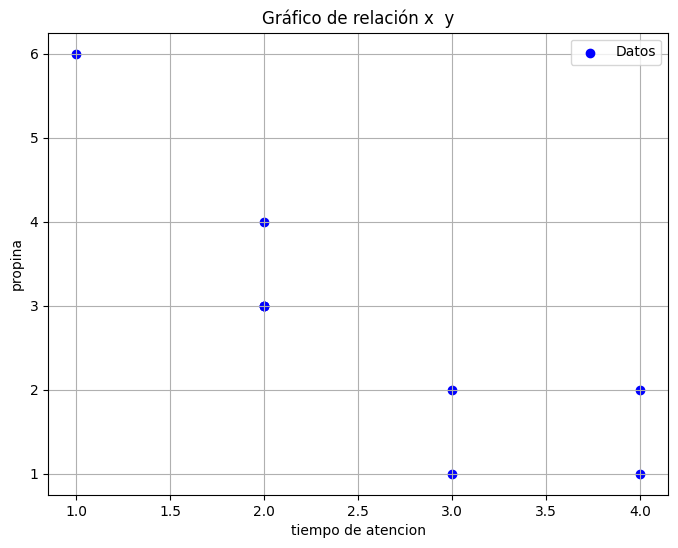

X: [3, 2, 2, 4, 1, 4, 3, 2, 2] Total = 23
Y: [1, 3, 3, 2, 6, 1, 2, 3, 4] Total = 25
X*Y: [3, 6, 6, 8, 6, 4, 6, 6, 8] Total = 53
X^2: [9, 4, 4, 16, 1, 16, 9, 4, 4] Total = 67
Y^2: [1, 9, 9, 4, 36, 1, 4, 9, 16] Total = 89

Coeficiente de Correlacion (r) = -0.859

PASO 1
B1 = -98 / 74  = -1.3243

PASO 2
B0 = 55.4589 / 9  = 6.1621

Ecuacion de Pronostico
Y = 6.1621 -1.3243 X

Y=B0+B1X : [2.1892, 3.5135, 3.5135, 0.8649, 4.8378, 0.8649, 2.1892, 3.5135, 3.5135] 
Media = 2.78

SRC = [0.3464, 0.5413, 0.5413, 3.6591, 4.2437, 3.6591, 0.3464, 0.5413, 0.5413] 
Total = 14.419899999999998

Sce = [1.4142, 0.2637, 0.2637, 1.2885, 1.3507, 0.0183, 0.0358, 0.2637, 0.2367] 
Total = 5.1353

SCT = 19.5552

Coeficiente de Determinacion (r^2)= 14.42 / 19.56 = 0.7374


In [14]:
# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [3,2,2,4,1,4,3,2,2]
TextX = "tiempo de atencion"
y = [1,3,3,2,6,1,2,3,4]
TextY = "propina"
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

print("X:",x,"Total =",sum(x))
print("Y:",y,"Total =",sum(y))

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

print("X*Y:",xy,"Total =",sum(xy))
print("X^2:",x2,"Total =",sum(x2))
print("Y^2:",y2,"Total =",sum(y2))

# Calculo de coeficiente de Correlacion
r = round((n * sum(xy) - sum(x) * sum(y)) / (math.sqrt(n * sum(x2) - (sum(x) ** 2)) * math.sqrt(n * sum(y2) - (sum(y) ** 2))),3)
print("\nCoeficiente de Correlacion (r) =", r)
#-----------------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Solo aplica para Regresion Lineal Simple
# CfD = round(r**2,4)
# print("Coeficiente de Determinacion Forma Simple =",CfD," ->",CfD*100,"%")
#----------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Como debe de ser

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,B1,"X")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n
print("\nY=B0+B1X :",yBoB1X,"\nMedia =",round(promedioyBoB1X,2))

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)
print("\nSRC =",Scr,"\nTotal =",sum(Scr))

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)
print("\nSce =",Sce,"\nTotal =",sum(Sce))

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (r^2)=",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4))


## Coeficiente de correlacion
La compresion de un resorte depende de la fuerza con que se aplique a aque segun los valores del siguiente cuadro.

![S7EjC4](../Images/S7EjC4.png)

Determine el coeficiente de correlacion y coeficiente de determinacion

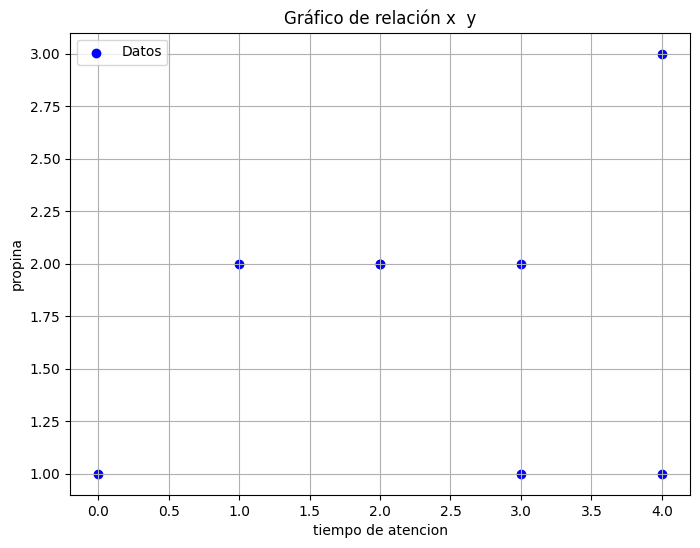

X: [1, 0, 2, 3, 4, 2, 3, 4] Total = 19
Y: [2, 1, 2, 2, 3, 2, 1, 1] Total = 14
X*Y: [2, 0, 4, 6, 12, 4, 3, 4] Total = 35
X^2: [1, 0, 4, 9, 16, 4, 9, 16] Total = 59
Y^2: [4, 1, 4, 4, 9, 4, 1, 1] Total = 28

Coeficiente de Correlacion (r) = 0.2511

PASO 1
B1 = 14 / 111  = 0.1261

PASO 2
B0 = 11.6041 / 8  = 1.4505

Ecuacion de Pronostico
Y = 1.4505 0.1261 X

Y=B0+B1X : [1.5766, 1.4505, 1.7027, 1.8288, 1.9549, 1.7027, 1.8288, 1.9549] 
Media = 1.75

SRC = [0.0301, 0.0897, 0.0022, 0.0062, 0.042, 0.0022, 0.0062, 0.042] 
Total = 0.22060000000000005

Sce = [0.1793, 0.203, 0.0884, 0.0293, 1.0922, 0.0884, 0.6869, 0.9118] 
Total = 3.2793

SCT = 3.4999

Coeficiente de Determinacion (r^2)= 0.22 / 3.5 = 0.063  -> 6.303 %


In [15]:
# Datos
#pregunta= "¿Cuánto en Promedio recibirá de propina un moso que se ha demorado en atender 3.5 minutos?"
#VariableX = 3.5
x = [1,0,2,3,4,2,3,4]
#TextX = "tiempo de atencion"
y = [2,1,2,2,3,2,1,1]
#TextY = "propina"
n = len(x)

#------------------------------------------------
# Creacion y muestra en pantalla del grafico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')
# Personalizar el gráfico
plt.title('Gráfico de relación x  y')
plt.xlabel(TextX)
plt.ylabel(TextY)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()
#-----------------------------------------------

print("X:",x,"Total =",sum(x))
print("Y:",y,"Total =",sum(y))

# Calculo x*y | x^2 | y^2
xy=[]
x2=[]
y2=[]
for posC,numero in enumerate(x):
    valorXY = numero*y[posC]
    valorX2 = numero**2
    valorY2 = y[posC]**2
    xy.append(valorXY)
    x2.append(valorX2)
    y2.append(valorY2)

print("X*Y:",xy,"Total =",sum(xy))
print("X^2:",x2,"Total =",sum(x2))
print("Y^2:",y2,"Total =",sum(y2))

# Calculo de coeficiente de Correlacion
r = round((n * sum(xy) - sum(x) * sum(y)) / (math.sqrt(n * sum(x2) - (sum(x) ** 2)) * math.sqrt(n * sum(y2) - (sum(y) ** 2))),4)
print("\nCoeficiente de Correlacion (r) =", r)
#-----------------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Solo aplica para Regresion Lineal Simple
# CfD = round(r**2,4)
# print("Coeficiente de Determinacion Forma Simple =",CfD," ->",CfD*100,"%")
#----------------------------------------------------------
# Calculo de coeficiente de Determinacion -> Como debe de ser

# CALCULO DE COEFICIENTES PRACTICO
# PASO 1.
NuB1 = (n*sum(xy))-(sum(x)*sum(y))
DeNB1 = (n*sum(x2))-(sum(x)**2)
B1 = round(NuB1/DeNB1,4)
print("\nPASO 1\nB1 =",NuB1,"/",DeNB1," =",B1)

# PASO 2.
NuB0 = (sum(y)-B1*sum(x))
B0 = round(NuB0/n,4)
print("\nPASO 2\nB0 =",NuB0,"/",n," =",B0)

# Ecuacion de Pronostico:
print("\nEcuacion de Pronostico\nY =",B0,B1,"X")

# Calculamos Y=B0+B1X
yBoB1X = []
for posC,numero in enumerate(x):
    valor = round(B0+B1*numero,4)
    yBoB1X.append(valor)
promedioyBoB1X = sum(yBoB1X)/n
print("\nY=B0+B1X :",yBoB1X,"\nMedia =",round(promedioyBoB1X,2))

# Calculamos SCR
Scr = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-promedioyBoB1X)**2,4)
    Scr.append(valor)
print("\nSRC =",Scr,"\nTotal =",sum(Scr))

# Calculamos SCE
Sce = []
for posC,numero in enumerate(yBoB1X):
    valor = round((numero-y[posC])**2,4)
    Sce.append(valor)
print("\nSce =",Sce,"\nTotal =",sum(Sce))

# Calculamos SCT
Sct = round(sum(Scr)+sum(Sce),4)
print("\nSCT =",Sct)

# Calculamos R^2
r2 = sum(Scr)/Sct
print("\nCoeficiente de Determinacion (r^2)=",round(sum(Scr),2),"/",round(Sct,2),"=",round(r2,4)," ->",round(r2*100,4),"%")